In [1]:
import numpy as np
import pandas as pd
import csv
import random
import math
from datetime import datetime
import matplotlib.pyplot as plt

# Считывание данных из файла и их подготовка

In [2]:
def getBdate(bdate):
  return datetime.strptime(bdate, '%d.%m.%Y').month

## Студенты

In [3]:
# подготовленный датасет
train_data = []
# датасет для тестирования
test_data = []

drop_column = ['№п/п', 'Основание поступления']
gender_dict = {'Мужской': 1,'Женский': 0}

# Считывание датасета из файла
df = pd.read_csv('data/input.csv', sep=',')
df.drop(drop_column, axis = 1, inplace = True)

# переводим пол в числовой формат, т. к. это будет один из признаков
df['Пол'].replace(gender_dict, inplace = True) 

# приводим баллы по ЕГЭ к диапозону от 0 до 1
df.astype({'Баллы ЕГЭ': 'float'}).dtypes
df['Баллы ЕГЭ'] /= 100

fios = df['ФИО'].unique()
subjects = df['Предметы ЕГЭ'].unique()
cities = df['Населенный пункт по прописке'].unique()
schools = df['Учебное заведение'].unique()
classes = df['Специальность/направление'].unique()

# количество признаков входного слоя
feature_count = len(subjects) + 1

# Preprocessing dataset
for el in fios:
    # Берем все строки студента
    student = df[df['ФИО'] == el]
    # Инициализируем массив признаков студента
    features = np.zeros((feature_count))
    # Заполняем признаки
    # Предметы
    for i in range(len(subjects)):
        res = student.loc[student['Предметы ЕГЭ'] == subjects[i], 'Баллы ЕГЭ'].values
        features[i] = res[0] if len(res) else 0
    # Пол
    features[len(subjects)] = student.iloc[0]['Пол']
#     features[len(subjects)+1] = getBdate(student.iloc[0]['Дата рождения']) / 12
    
#     city_index = np.where(cities == student.iloc[0]['Населенный пункт по прописке'])[0]
#     features[len(subjects)+2] = 0 if len(city_index) == 0 else city_index[0]/len(cities)
    
#     school_number = np.where(schools == student.iloc[0]['Учебное заведение'])[0]
#     features[len(subjects)+3] = 0 if len(school_number) == 0 else school_number[0]/len(schools)
    
    # Нормализация входного вектора x/length(vector)
    norm_features = np.zeros((feature_count))
    for i in range(len(features)):
        sum = 0 
        for j in range(len(features)):
            sum += features[j] ** 2
        norm_features[i] = features[i] / math.sqrt(sum)
#     norm_features = (features * features.mean()) / features.std()
    
    res = np.zeros((len(classes)))
    res[np.where(classes == student.iloc[0]['Специальность/направление'])[0][0]] = 1
    
    # Нормализованные
#     temp_data = dict(fio = el, features = norm_features, result = res)
    # Не нормализованные
    temp_data = dict(fio = el, features = features, result = res)
    
    # 90% - train, 10% - test
    if (len(train_data) / len(fios)) < 0.9:
        train_data.append(temp_data)
    else:
        test_data.append(temp_data)

## Студенты (информатика)

In [4]:
# # подготовленный датасет
# train_data = []
# # датасет для тестирования
# test_data = []

# drop_column = ['№п/п', 'Основание поступления']
# gender_dict = {'Мужской': 1,'Женский': 0}

# df = pd.read_csv('data/input.csv', sep=',')
# df.drop(drop_column, axis = 1, inplace = True)

# # переводим пол в числовой формат, т. к. это будет один из признаков
# df['Пол'].replace(gender_dict, inplace = True) 

# # приводим баллы по ЕГЭ к диапозону от 0 до 1
# df.astype({'Баллы ЕГЭ': 'float'}).dtypes
# df['Баллы ЕГЭ'] /= 100

# # Смотрим только для информатики
# # 'Информатика и ИКТ' 'Физика' 'Обществознание'
# fios = df.loc[df['Предметы ЕГЭ'] == 'Информатика и ИКТ', 'ФИО']
# classes = df.loc[df['Предметы ЕГЭ'] == 'Информатика и ИКТ', 'Специальность/направление'].unique()
# subjects = df.loc[df['Специальность/направление'].isin(classes), 'Предметы ЕГЭ'].unique()
# print(subjects)

# # количество признаков входного слоя
# feature_count = len(subjects) + 1

# for el in fios:
#     student = df[df['ФИО'] == el]
#     features = np.zeros((feature_count))
#     for i in range(len(subjects)):
#         res = student.loc[student['Предметы ЕГЭ'] == subjects[i], 'Баллы ЕГЭ'].values
#         features[i] = res[0] if len(res) else 0
#     features[len(subjects)] = student.iloc[0]['Пол']
    
#     # Нормализация входного вектора x/length(vector)
#     norm_features = np.zeros((feature_count))
#     for i in range(len(features)):
#         sum = 0 
#         for j in range(len(features)):
#             sum += features[j] ** 2
#         norm_features[i] = features[i] / math.sqrt(sum)
# #     norm_features = (features * features.mean()) / features.std()
    
#     res = np.zeros((len(classes)))
#     res[np.where(classes == student.iloc[0]['Специальность/направление'])[0][0]] = 1
    
#     # Нормализованные
# #     temp_data = dict(fio = el, features = norm_features, result = res)
#     # Не нормализованные
#     temp_data = dict(fio = el, features = features, result = res)
    
#     # 90% - train, 10% - test
#     if (len(train_data) / len(fios)) < 0.9:
#         train_data.append(temp_data)
#     else:
#         test_data.append(temp_data)
#         #train_data.append(temp_data)
# print(feature_count)

## Ирис

In [5]:
# # количество признаков входного слоя
# feature_count = 4

# df = pd.read_csv('data/iris.csv', sep=',')

# # подготовленный датасет
# train_data = []
# # датасет для тестирования
# test_data = []

# classes = df["variety"].unique()

# df = df.sample(frac=1).reset_index(drop=True)

# for i in range(len(df)) : 

#     features = np.zeros((feature_count))
#     features[0] = df.loc[i, "sepal.length"]
#     features[1] = df.loc[i, "sepal.width"]
#     features[2] = df.loc[i, "petal.length"]
#     features[3] = df.loc[i, "petal.width"]
    
#     # Нормализация входного вектора
#     norm_features = features/np.linalg.norm(features)
    
#     res = np.zeros((len(classes)))
#     res[np.where(classes == df.loc[i, "variety"])[0].item(0)] = 1
    
#     temp_data = dict(name = str(i), 
#                      features = norm_features, 
#                      result = res)
    
#     if (len(train_data) / len(df)) < 0.9:
#         train_data.append(temp_data)
# #         test_data.append(temp_data)
#     else:
# #         train_data.append(temp_data)
#         test_data.append(temp_data)

# Обучение

## Кохонен

In [6]:
def getKohonenWinnerIndex(x, neuron_counts, w, s):
    # Индекс нейрона победителя
    result = 0
    # Значение нейрона победителя
    max_net = -1
    # Проходим по всем нейронам Кохонена
    for i in range(neuron_counts):
        net = 0
        # Проходим по всем нейронам входного слоя
        for j in range(len(x)):
            net += x[j] * w[j][i] * s[i]
        # Определяем максимальное ли значение у данного нейрона?
        if (net > max_net):
            result = i
            max_net = net
    return result

def mse(pred, actual):
    return np.square(np.subtract(actual,pred)).mean()

### Инициализация параметров обучения

In [7]:
# Cкорость обучения слоя Кохонена
# 0.7 для студентов
# 0.7 для студентов (информатика)
# 0.4 для ирисок 
theta = 0.1
# Cкорость обучения слоя Гроссберга
# 0.1 для студентов 
# 0.1 для студентов (информатика)
# 0.2 для ирисок
beta = 0.1
# Коэффициент изменения скорости обучения слоя Кохонена
# Для студентов 0.09
# Для студентов (информатика) 0.09
# Для ирисок 0,1
thetaSpeed = 0.15
# Коэффициент изменения скорости обучения слоя Гроссберга
# Для студентов 0.06
# Для студентов (информатика) 0.06
# Для ирисок 0,08
betaSpeed = 0.06
# количество нейронов кохонена
# 35 для студентов
# 35 для студентов (информатика)
# 15 для ирисок
kohonen_neuron_count = 60
# количество эпох
# 15 для студентов
# 15 для студентов (информатика)
# 10 для ирисок
epoch_count = 150
# Коэффициент увеличения штрафа
# Для студентов 0.7
# Для студентов (информатика) 0.7 
# Для ирисок 0,7
fine = 0.7

### Обучение слоев Кохонена и Гроссберга

In [8]:
#количество нейронов выходного слоя (слоя Гроссберга) = количество проффессий 
grossberg_neuron_counts = len(train_data[0]['result'])
# штрафы кластеров
s_w = np.ones((kohonen_neuron_count))

#инициализация начальных весов слоя Кохонена kohonen_w[x][y]
# x - индекс нейрона входного слоя
# y - индекс нейрона слоя Кохонена
# веса устанавливаются рандомно от 0 до 1
kohonen_w = np.random.uniform(0, 1, (len(train_data[0]['features']), kohonen_neuron_count))

# Инициализация начальных весов слоя Гроссберга grossberg_w[x][y]
# x - индекс нейрона слоя Кохонена
# y - индекс нейрона слоя Гроссберга
# веса устанавливаются рандомно от 0 до 1
grossberg_w = np.random.uniform(0, 1, (kohonen_neuron_count, grossberg_neuron_counts))

# Результат на выходе слоя Гроссберга
element_result = np.zeros((grossberg_neuron_counts))

# Ошибка на каждом студенте
epoch_error = np.zeros((len(train_data)))

# Ошибка на каждой эпохе
train_err = np.zeros((epoch_count))
        
# Обучение на подготовленном датасете
for ep in range(epoch_count):
#     print('------------------')
#     print('Epoch ' + str(ep))
    for el in range(len(train_data)):

        # Берем студента
        train_el = train_data[el]

        # Определение нейрона победителя
        winner_index = getKohonenWinnerIndex(train_el['features'], kohonen_neuron_count, kohonen_w, s_w)

        # Увеличиваем штраф, уменьшая его коэффициент
        s_w[winner_index] *= fine

        # Корректировка весов нейрона победителя на слое Кохонена
        for i in range(feature_count):
            kohonen_w[i][winner_index] += theta * (train_el['features'][i] - kohonen_w[i][winner_index])

        # Корректировка весов для нейронов слоя Гроссберга, соединенных с нейроном победителем слоя Кохонена
        for i in range(grossberg_neuron_counts):
            grossberg_w[winner_index][i] += beta * (train_el['result'][i] - grossberg_w[winner_index][i])
            element_result[i] = grossberg_w[winner_index][i]
        
        epoch_error[el] = mse(element_result, train_el['result'])

    # Изменение скорости обучения
    theta, beta = theta - (theta * thetaSpeed), beta - (beta * betaSpeed)
    
    train_err[ep] = epoch_error.mean()

print(theta)
print(beta)

2.5872527494775247e-12
9.314896633914642e-06


## График изменения среднеквадратической ошибки от поколения

Размер тренировочной выборки: 150


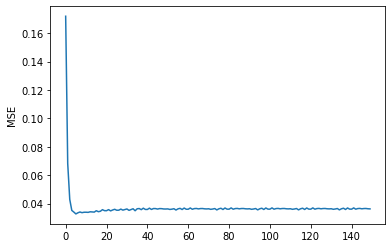

In [9]:
print("Размер тренировочной выборки: " + str(len(train_err)))
plt.plot(train_err)
plt.ylabel('MSE')
plt.show()

# Тестирование

## Тестирование студентов

## Тестирование на всех специальностях

In [10]:
accuracy = 0
s_w = np.ones((kohonen_neuron_count))

for student in test_data:
    print('ФИО: ' + student['fio'])
    print('Поступил на специальность: ' + classes[np.where(student['result'] == 1)[0][0]])
    print('Результаты нейросети:')
    # Определение нейрона победителя
    winner_index = getKohonenWinnerIndex(student['features'], kohonen_neuron_count, kohonen_w, s_w)
    best_results = [0.0, 0.0, 0.0]
    best_indexes = [0, 1, 2]
    max_res = 0.0
    max_index = 0
    for i in range(grossberg_neuron_counts):
        
        if (grossberg_w[winner_index][i] > best_results[0]):
            best_results[2] = best_results[1]
            best_results[1] = best_results[0]
            best_results[0] = grossberg_w[winner_index][i]
            best_indexes[2] = best_indexes[1]
            best_indexes[1] = best_indexes[0]
            best_indexes[0] = i
        elif (grossberg_w[winner_index][i] > best_results[1]):
            best_results[2] = best_results[1]
            best_results[1] = grossberg_w[winner_index][i]
            best_indexes[2] = best_indexes[1]
            best_indexes[1] = i
        elif (grossberg_w[winner_index][i] > best_results[2]):
            best_results[2] = grossberg_w[winner_index][i]
            best_indexes[2] = i
        
    print(classes[best_indexes[0]] + ': ' + str(grossberg_w[winner_index][best_indexes[0]] * 100) + '%')
    print(classes[best_indexes[1]] + ': ' + str(grossberg_w[winner_index][best_indexes[1]] * 100) + '%')
    print(classes[best_indexes[2]] + ': ' + str(grossberg_w[winner_index][best_indexes[2]] * 100) + '%')
    print('-------------------')
    print(classes[np.where(student['result'] == 1)[0][0]] + ': ' + str(grossberg_w[winner_index][np.where(student['result'] == 1)[0][0]] * 100) + '%')
    
    if (np.where(student['result'] == 1)[0][0] in best_indexes):
        accuracy += 1
    print('--------------------------------------------------')
print ('Точность: ' + str((accuracy / len(test_data)) * 100) + '%')

ФИО: Хисамиев Харис Мурадович
Поступил на специальность: Информатика и вычислительная техника
Результаты нейросети:
Информатика и вычислительная техника: 59.11535344867988%
Программная инженерия: 30.849344933215285%
Прикладная информатика (в экономике): 10.036159696549824%
-------------------
Информатика и вычислительная техника: 59.11535344867988%
--------------------------------------------------
ФИО: Хлесткова Мария Александровна
Поступил на специальность: Информатика и вычислительная техника
Результаты нейросети:
Прикладная информатика (в экономике): 39.812568245725984%
Программная инженерия: 32.69283552098033%
Информатика и вычислительная техника: 27.297661053012177%
-------------------
Информатика и вычислительная техника: 27.297661053012177%
--------------------------------------------------
ФИО: Хомич Игорь Александрович
Поступил на специальность: Конструирование и технология электронных средств
Результаты нейросети:
Конструкторско-технологическое обеспечение машиностроительных

## Тестирование студентов на отдельном предмете (информатика)

In [11]:
# accuracy = 0
# data = test_data
# #s_w = np.ones((kohonen_neuron_count))

# # inf = np.array([])
# # prog = np.array([])
# # econ = np.array([])

# for student in data:
#     print('ФИО: ' + student['fio'])
#     print('Поступил на специальность: ' + classes[np.where(student['result'] == 1)[0][0]])
#     print('Результаты нейросети:')
#     # Определение нейрона победителя
#     winner_index = getKohonenWinnerIndex(student['features'], kohonen_neuron_count, kohonen_w, s_w)
#     max_res = 0.0
#     max_index = 0
#     for i in range(grossberg_neuron_counts):
#         if (grossberg_w[winner_index][i] > max_res):
#             max_index = i
#             max_res = grossberg_w[winner_index][i]
        
#     print(classes[0] + ': ' + str(grossberg_w[winner_index][0] * 100) + '%')
#     print(classes[1] + ': ' + str(grossberg_w[winner_index][1] * 100) + '%')
#     print(classes[2] + ': ' + str(grossberg_w[winner_index][2] * 100) + '%')
#     print('-------------------')
#     print(classes[np.where(student['result'] == 1)[0][0]] + ': ' + str(grossberg_w[winner_index][np.where(student['result'] == 1)[0][0]] * 100) + '%')
    
# #     if np.where(student['result'] == 1)[0][0] == 0:
# #         inf = np.append(inf, [winner_index], axis=0)
# #     elif np.where(student['result'] == 1)[0][0] == 1:
# #         econ = np.append(econ, [winner_index], axis=0)
# #     elif np.where(student['result'] == 1)[0][0] == 2:
# #         prog = np.append(prog, [winner_index], axis=0)
    
#     if (np.where(student['result'] == 1)[0][0] == max_index):
#         accuracy += 1
#     print('--------------------------------------------------')
# print ('Точность: ' + str((accuracy / len(data)) * 100) + '%')

## Тестирование ирисок

In [12]:
# #s_w = np.ones((kohonen_neuron_count))

# right = 0
# pred = 0
# res = np.zeros((kohonen_neuron_count))
# for test_el in test_data:
#     print('Индекс: ' + test_el['name'])
#     print('Это вид: ' + classes[np.where(test_el["result"] == 1)[0][0]])
#     print('Результаты нейросети:')
#     # Определение нейрона победителя
#     winner_index = getKohonenWinnerIndex(test_el['features'], kohonen_neuron_count, kohonen_w, s_w)
#     print(winner_index)
#     res[winner_index] += 1
#     temp = 0
#     max_res = grossberg_w[winner_index][0] * 100
#     max_index = 0
#     for i in range(grossberg_neuron_counts):
#         result = grossberg_w[winner_index][i] * 100
#         if max_res < result:
#             max_res, max_index = result, i
#         print(classes[i] + ': ' + str(result) + '%')
     
#     if np.where(test_el['result'] == 1)[0][0] == max_index:
#         print('right')
#         right += 1
#     else:
#         print('wrong')
#     print('--------------------------------------------------')
# print ('Точность: ' + str((right / len(test_data)) * 100) + '%')